In [12]:
def Auto_EDA():
  import pandas as pd
  import sqlite3
  import numpy as np
  import matplotlib.pyplot as plt
  import seaborn as sns
  import missingno as msno
  import warnings
  # set maxmum number of columns
  pd.options.display.max_columns= None
  # set maxmum number of rows
  pd.options.display.max_rows= None
  warnings.filterwarnings("ignore")
  from sklearn.preprocessing import LabelEncoder
  data_path= input("enter your data path")
  if 'csv' in data_path:
    df=pd.read_csv(data_path)
  elif 'xls' in data_path:
    df=pd.read_excel(data_path)
  elif 'sql' in data_path:
     # Creating an in-memory SQLite database
   conn = sqlite3.connect(':memory:')
   cursor = conn.cursor()

   with open(data_path, 'r') as sql_file:
        sql_script = sql_file.read()

   cursor.executescript(sql_script)
      # Update with your table name
   query_result = cursor.execute('SELECT * FROM your_table_name')
   column_names = [description[0] for description in query_result.description]
   df = pd.DataFrame(query_result.fetchall(), columns=column_names)

   conn.close()
  else:
    print("Unsupported file type")

  print("start to check Data wrangling")
  print(df.head())
  print(df.shape)
  print(df.info())
  print(df.describe(include="all"))

  print("check duplicated values")
  print(df.duplicated().sum())

  print("drop duplicated if exist")

  print(df.drop_duplicates())

  print("check missing values")
  print(df.isnull().sum(axis=0))

  print("visualize missing values if it exist")

  print("Content of msno.bar():")
  print(msno.bar(df,fontsize=12, figsize=(10,8)))

  print("\nContent of plt.title():")
  print(plt.title("The missing Values in Columns", y=1.1, fontsize=20))

  print("drop missing values")
  print(df.dropna())

  print("see distribution of data")
  print(df.hist(figsize=(15,12), color="green"))

  print("check thpes of columns")

  columnsToEncode = list(df.select_dtypes(include=['category','object','bool']))
  le = LabelEncoder()
  for feature in columnsToEncode:
        try:
            df[feature] = le.fit_transform(df[feature])
        except:
            print('Error encoding '+feature)
  plt.figure(1, figsize=(15,5))
  sns.heatmap(df.corr(), annot=True)

  df.plot( subplots=True, figsize=(20,15))
  plt.show()

  sns.pairplot(df)
  plt.show()

  for col in df.columns:
     df[col].hist()
     plt.xlabel(col)
     plt.show()

     df[col].plot(kind = 'box')
     plt.show()
















enter your data path/content/International_Report_Passengers.csv
start to check Data wrangling
     data_dte  Year  Month  usg_apt_id usg_apt  usg_wac  fg_apt_id fg_apt  \
0  05/01/2014  2014      5       14492     RDU       36      11032    CUN   
1  06/01/2007  2007      6       13204     MCO       33      16085    YHZ   
2  12/01/2005  2005     12       11433     DTW       43      10411    AUA   
3  04/01/2003  2003      4       13487     MSP       63      16304    ZIH   
4  12/01/2005  2005     12       12016     GUM        5      11138    CRK   

   fg_wac  airlineid carrier  carriergroup        type  Scheduled  Charter  \
0     148      19534      AM             0  Passengers          0      315   
1     951      20364      C6             0  Passengers          0      683   
2     277      20344      RD             1  Passengers          0     1010   
3     148      20204      MG             1  Passengers          0      508   
4     766      20312      TZ             1  Passenge

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



data_dte           0
Year               0
Month              0
usg_apt_id         0
usg_apt            0
usg_wac            0
fg_apt_id          0
fg_apt             0
fg_wac             0
airlineid          0
carrier         2797
carriergroup       0
type               0
Scheduled          0
Charter            0
Total              0
dtype: int64
visualize missing values if it exist
Content of msno.bar():
Axes(0.125,0.11;0.775x0.77)

Content of plt.title():
Text(0.5, 1.1, 'The missing Values in Columns')
drop missing values


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



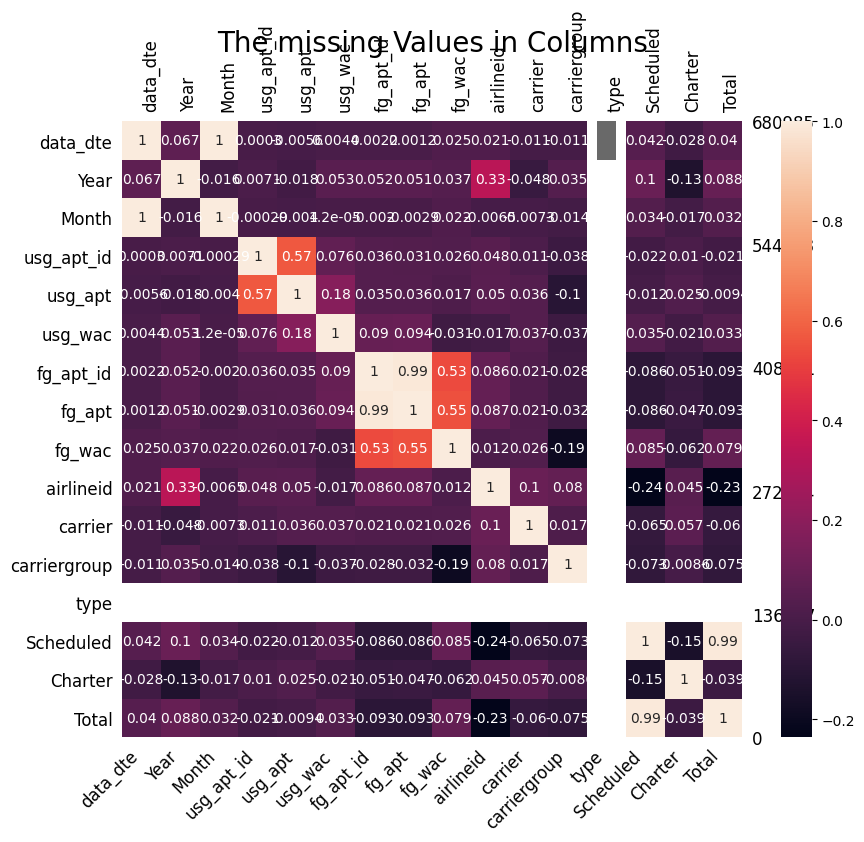

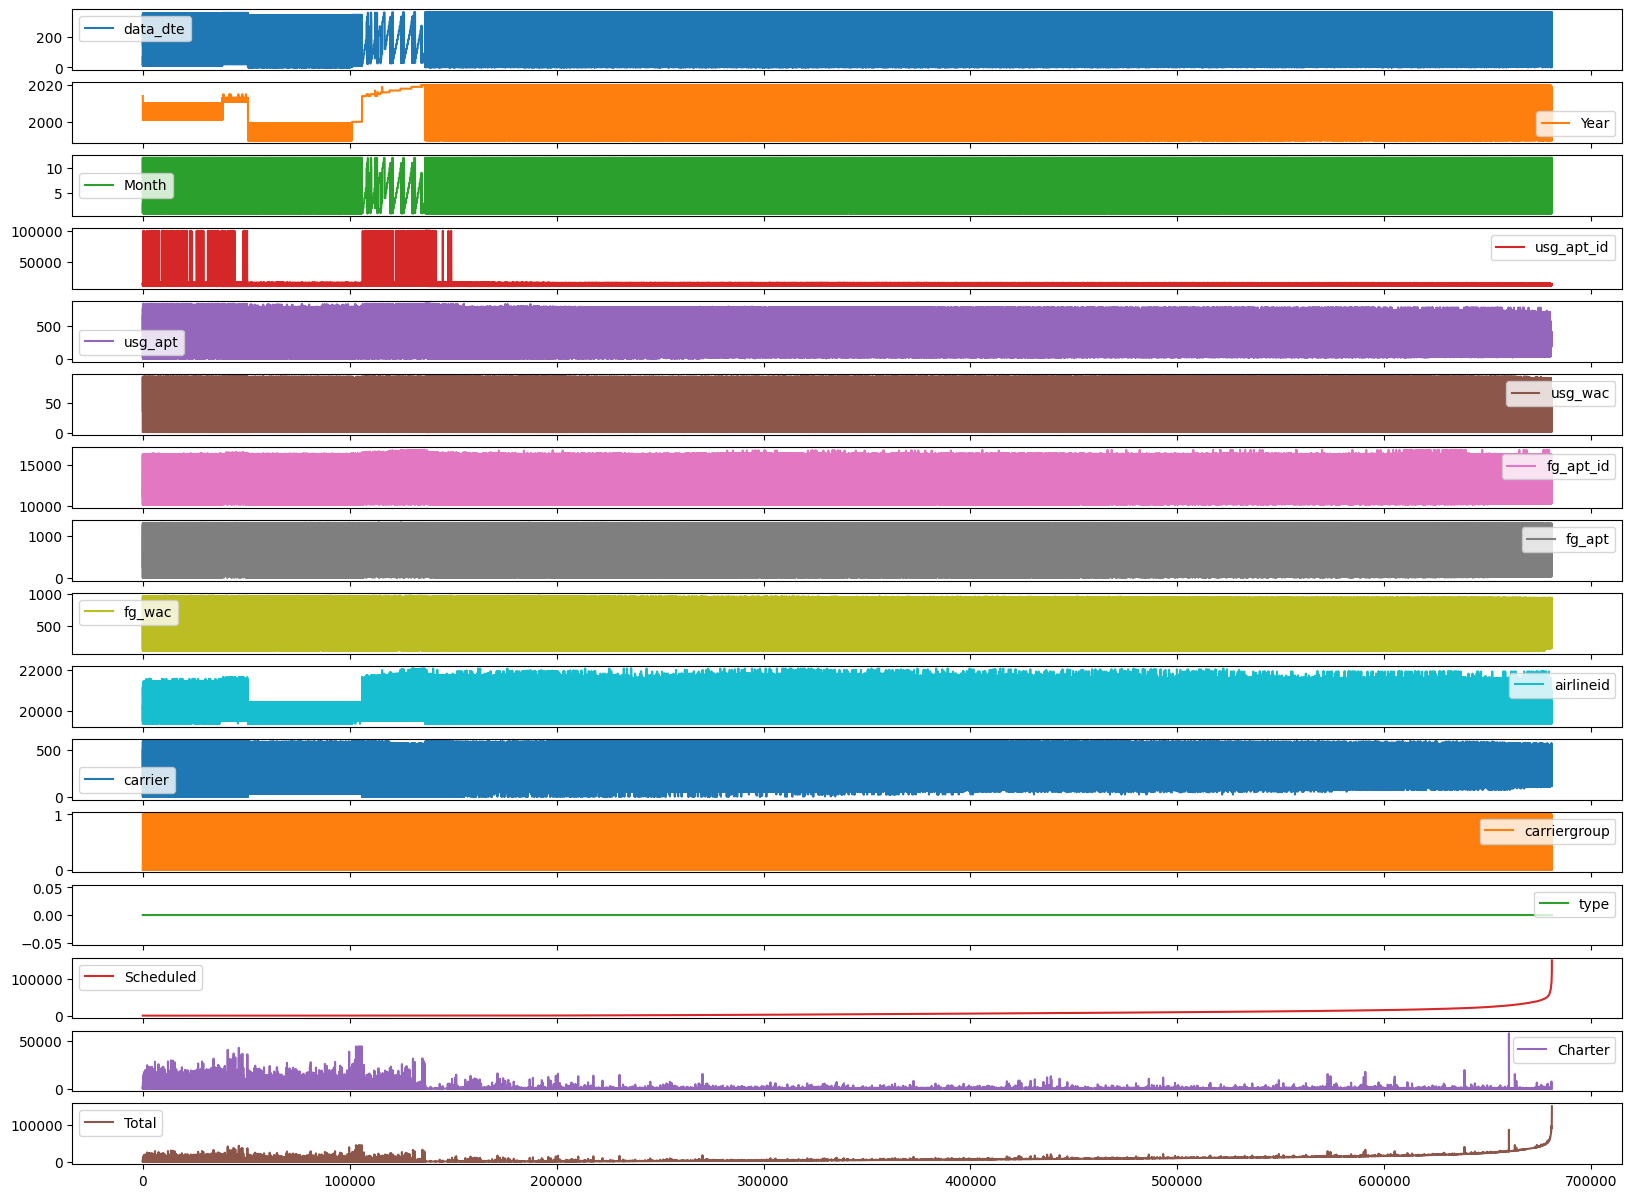

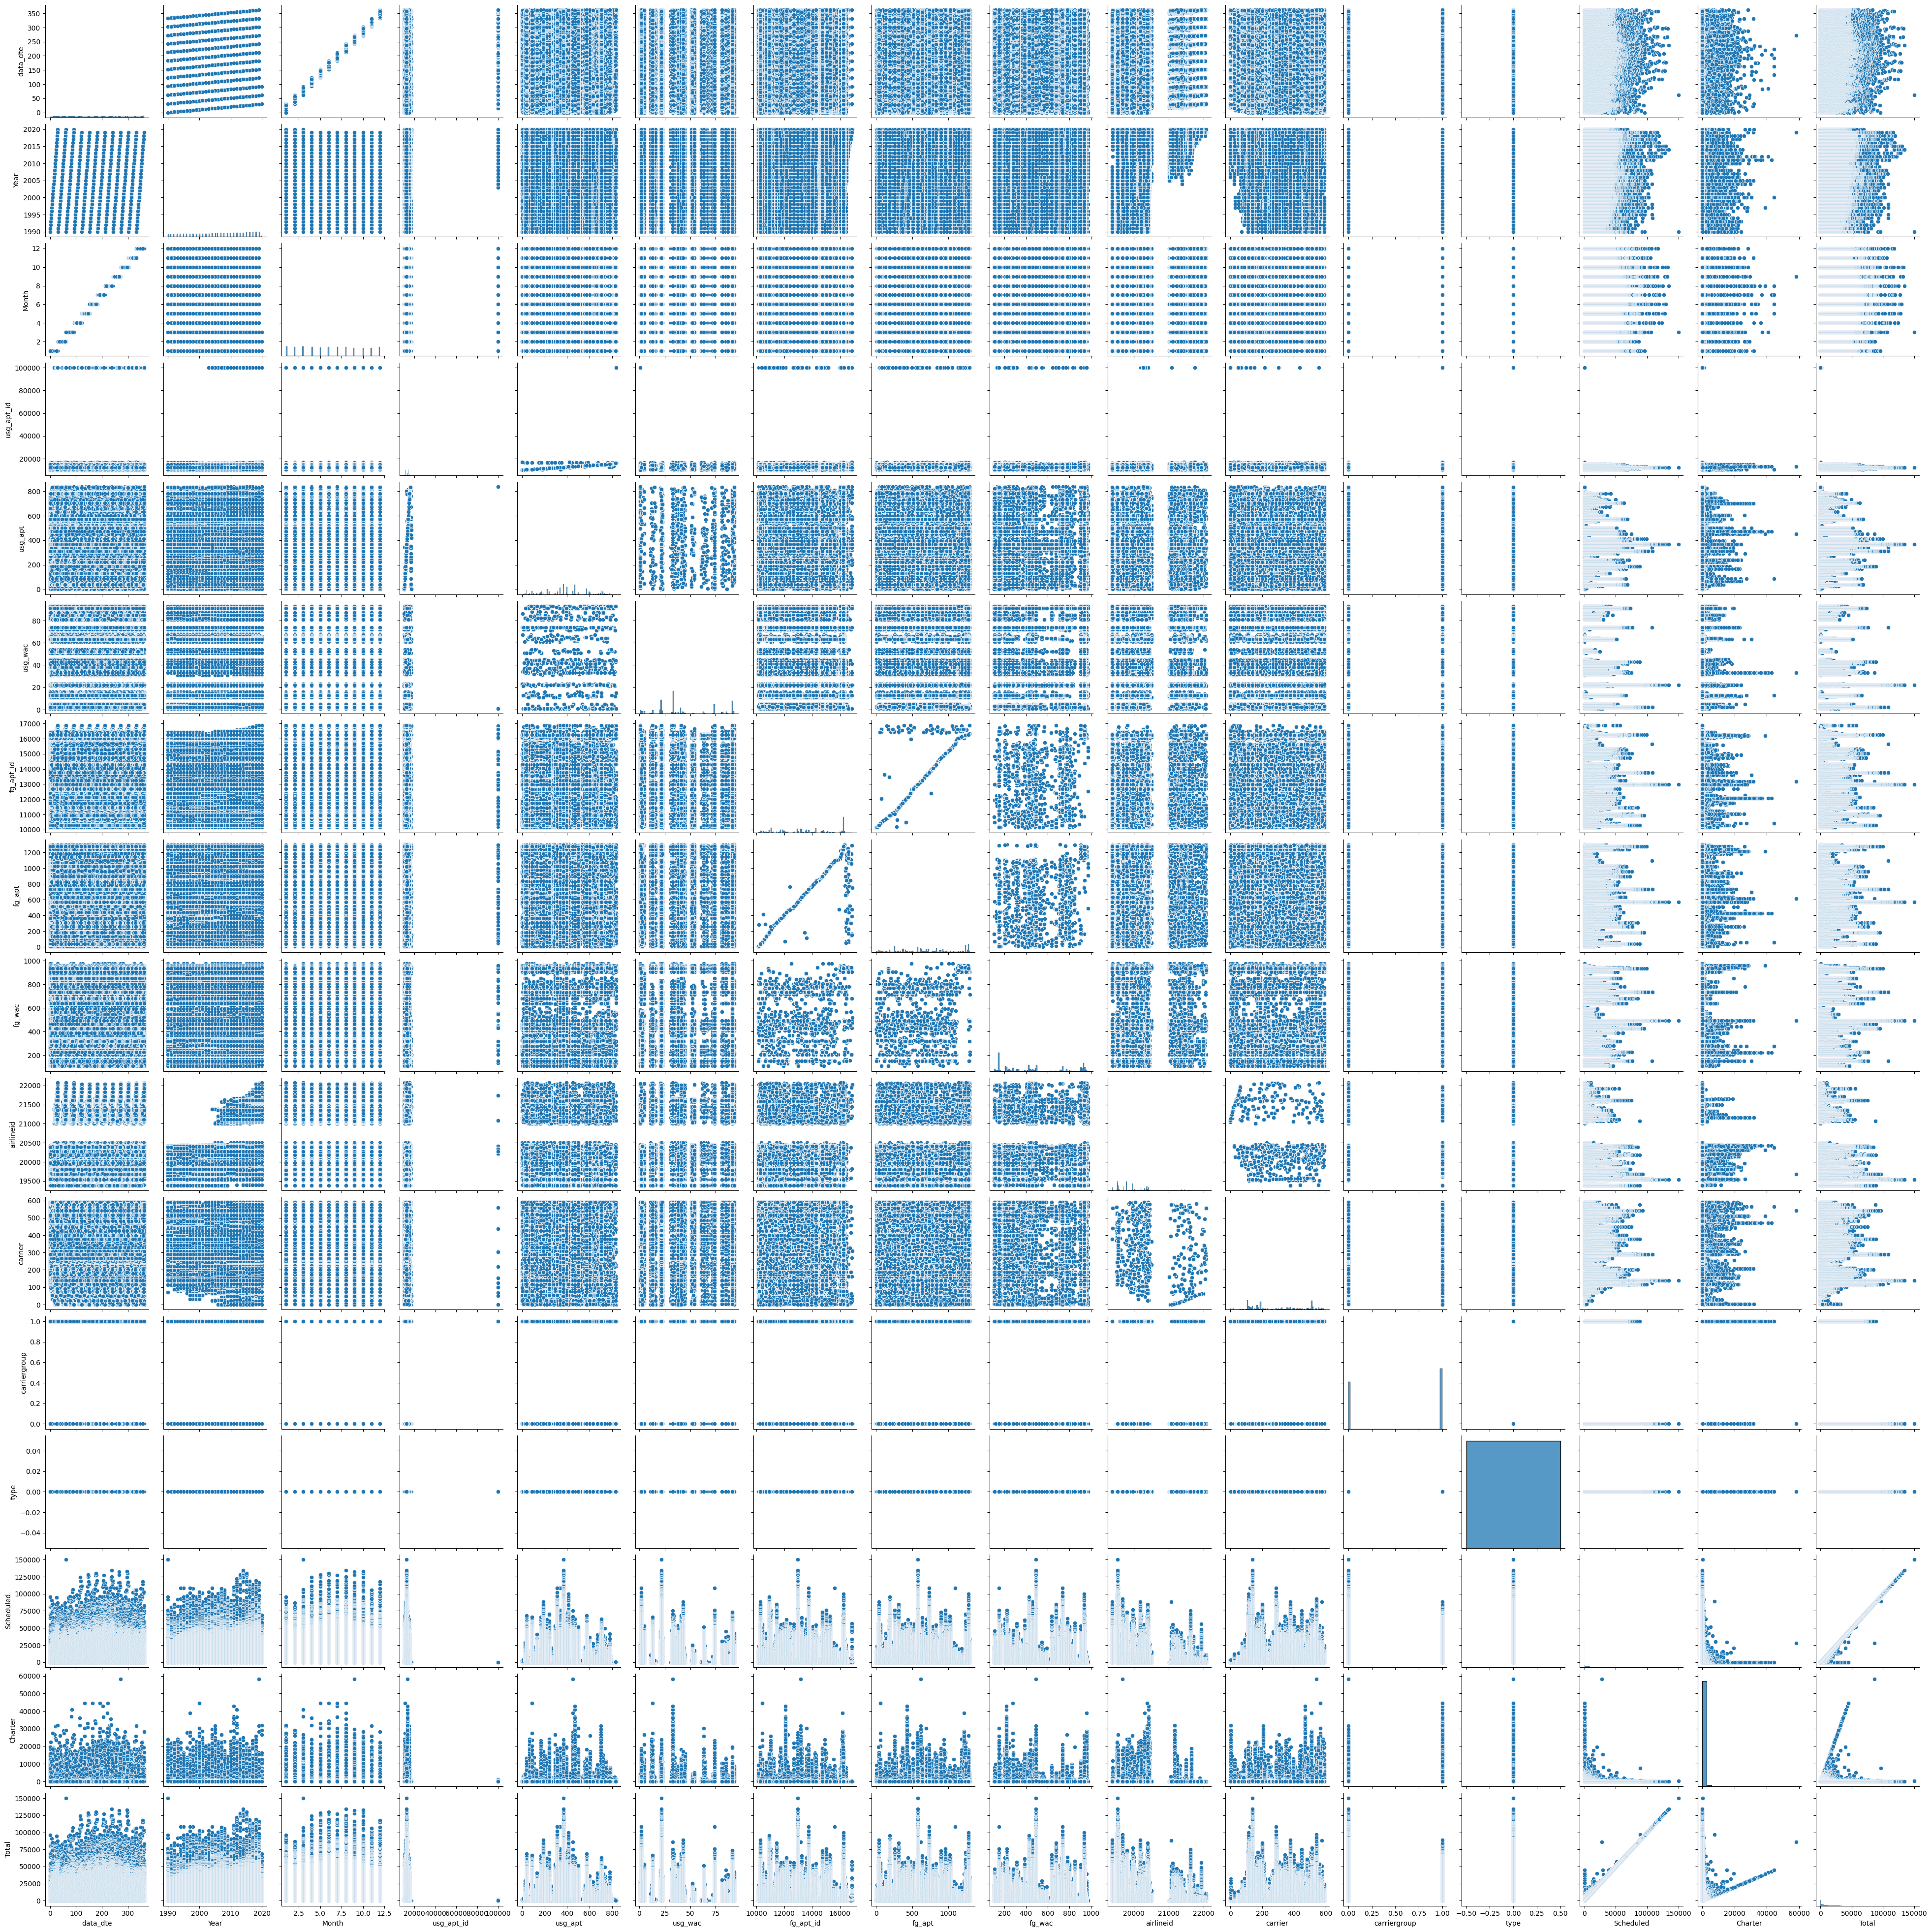

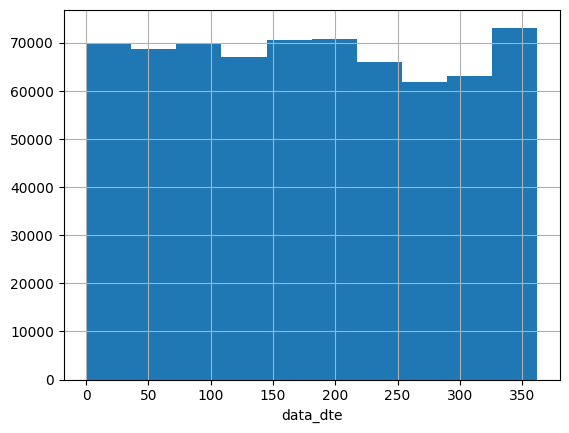

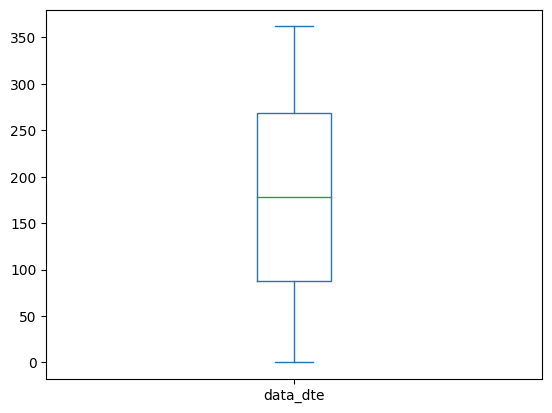

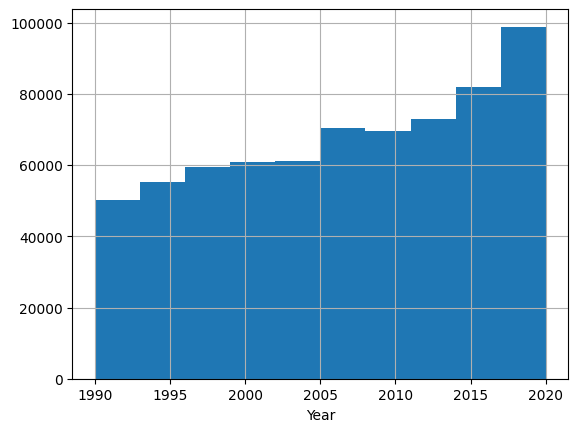

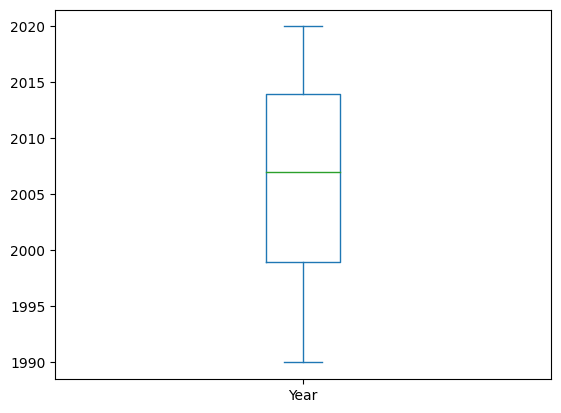

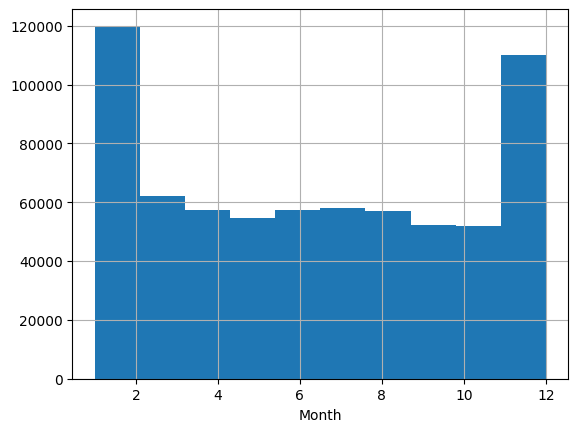

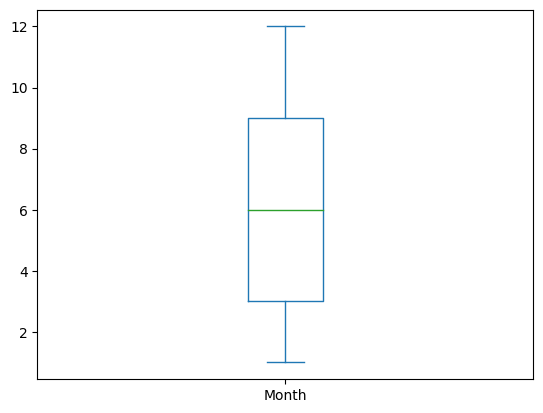

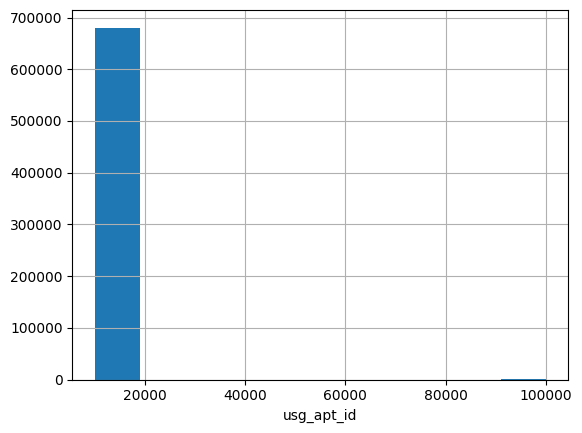

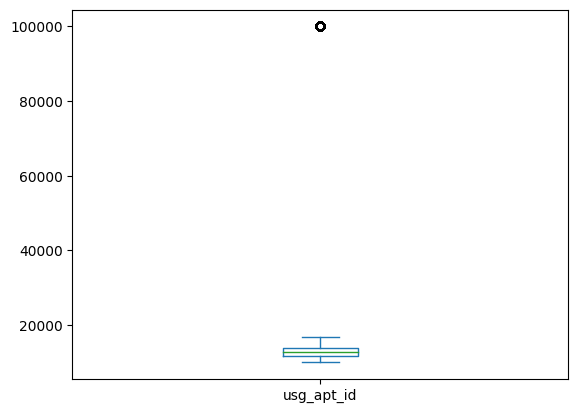

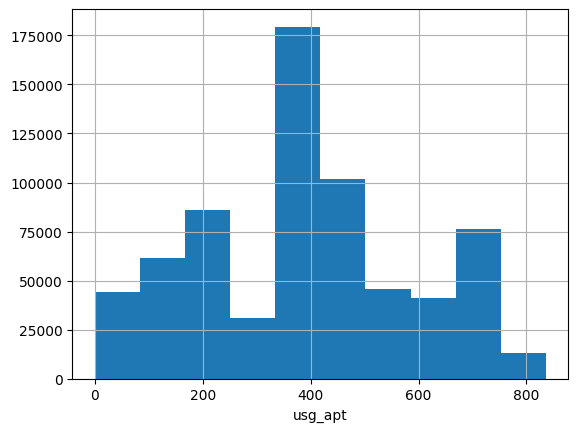

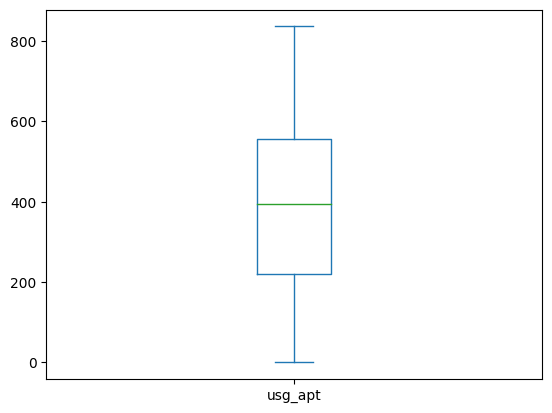

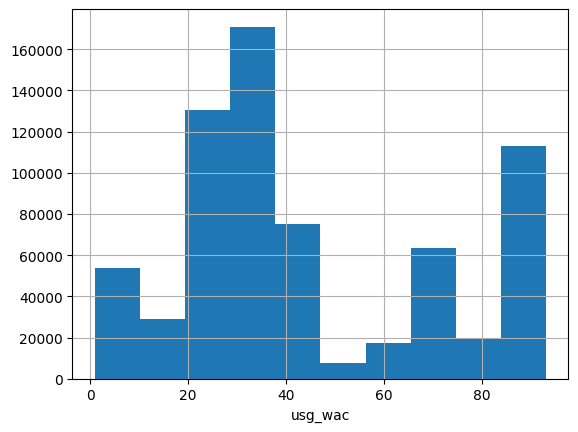

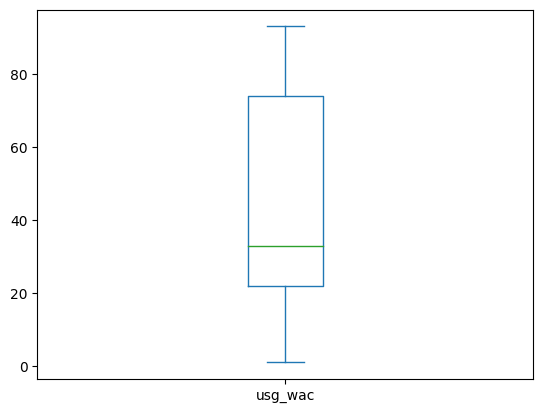

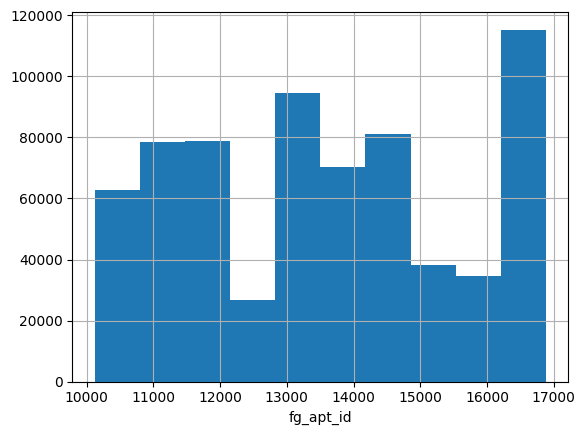

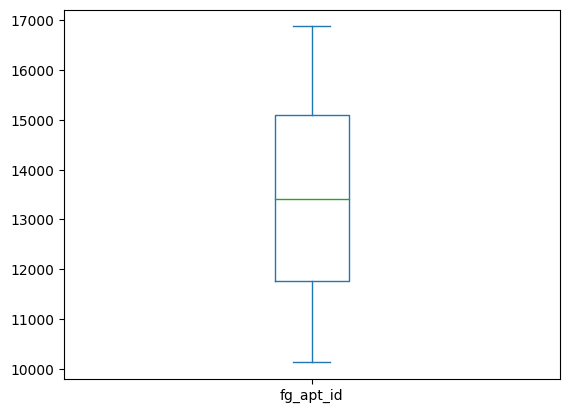

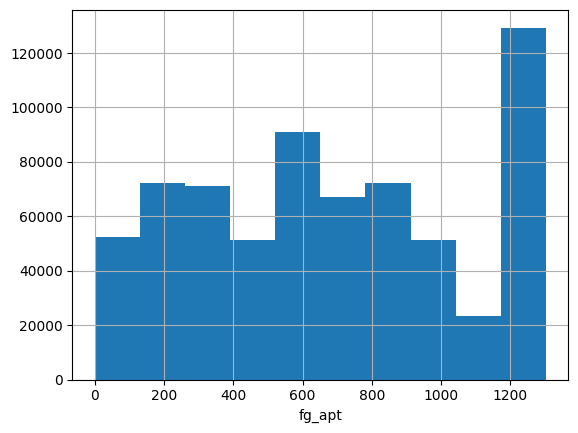

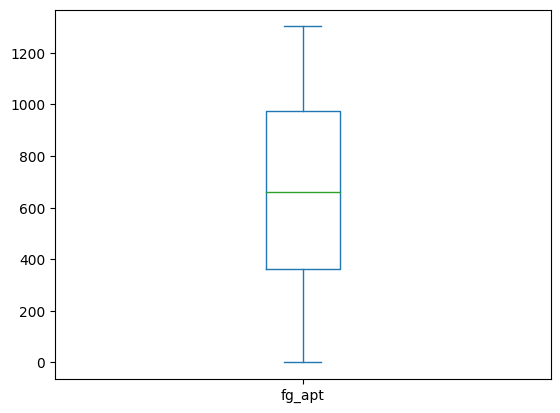

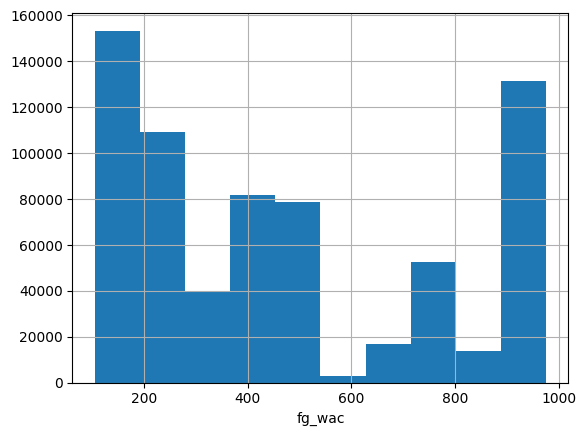

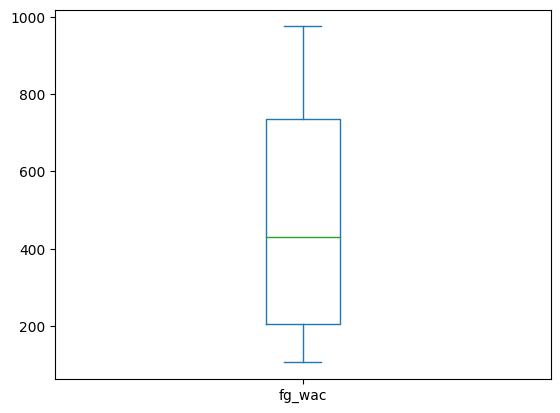

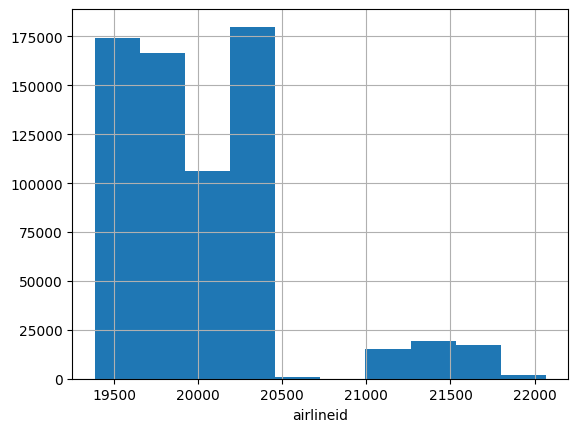

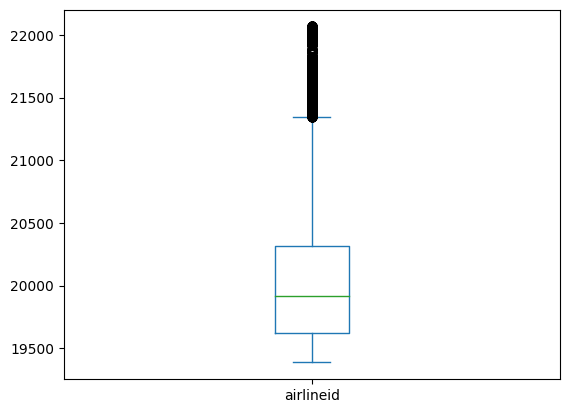

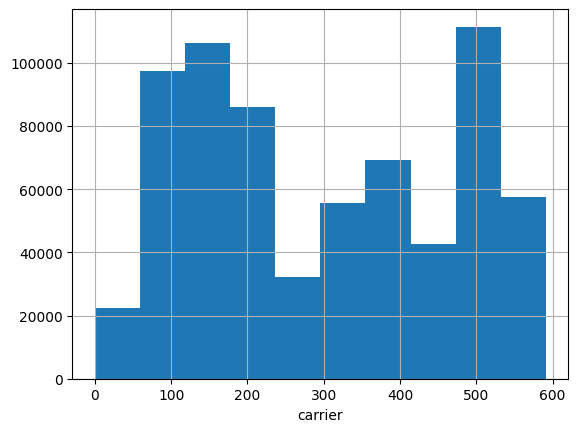

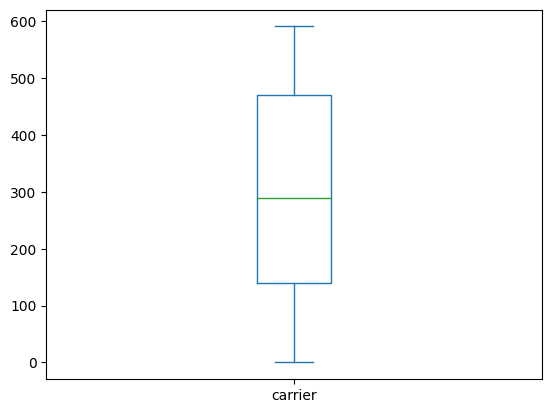

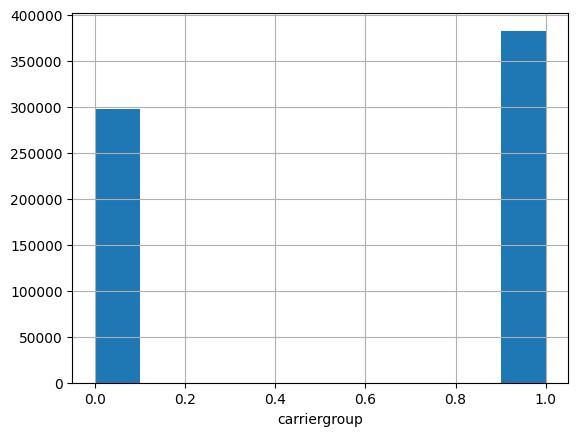

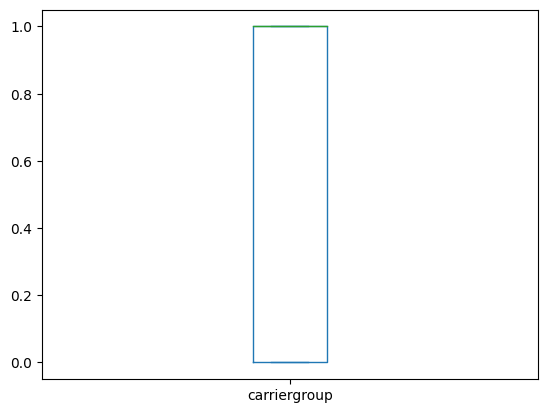

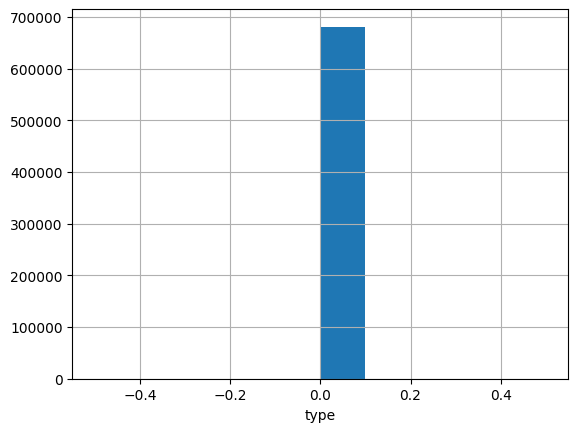

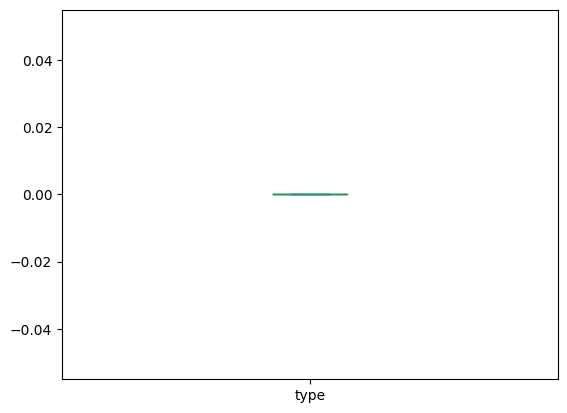

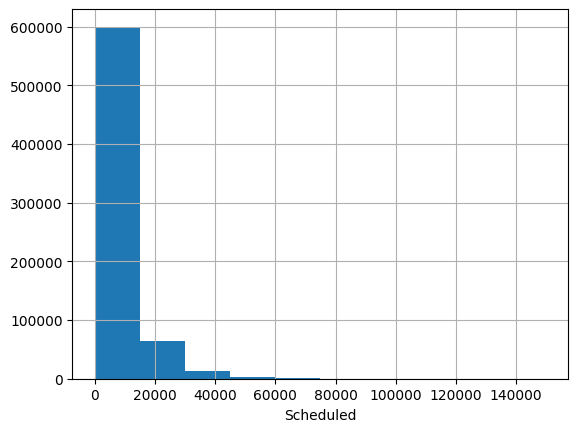

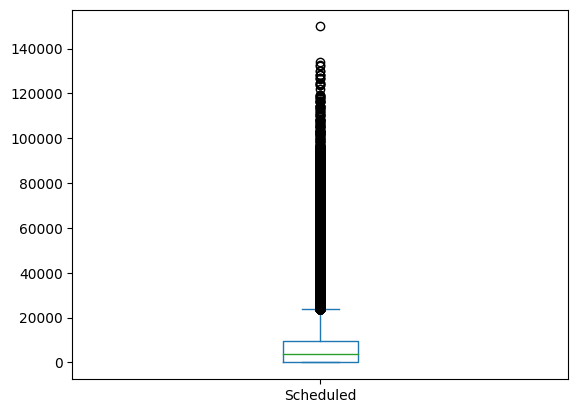

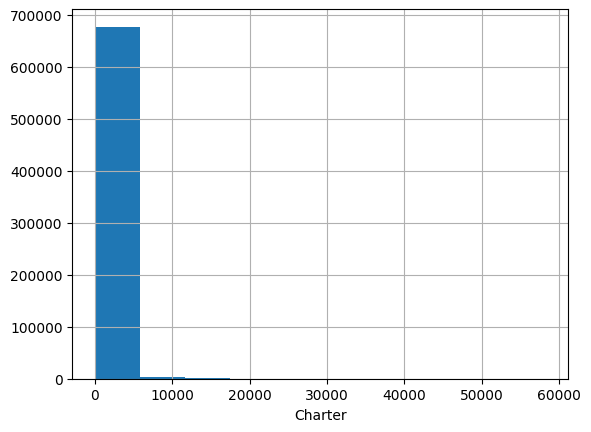

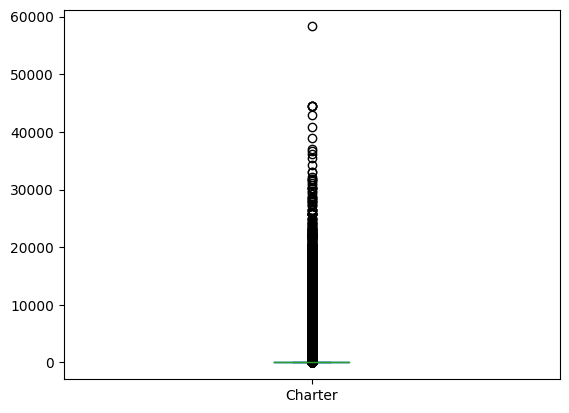

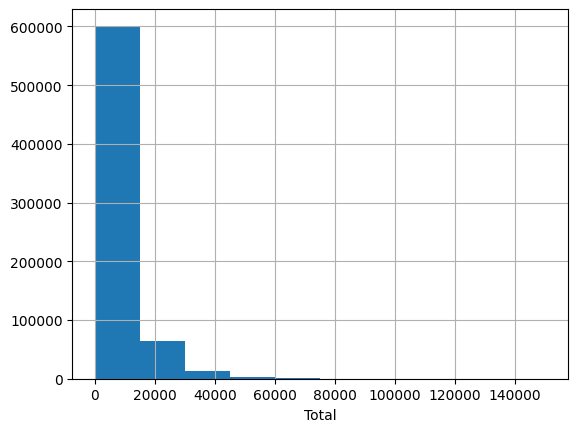

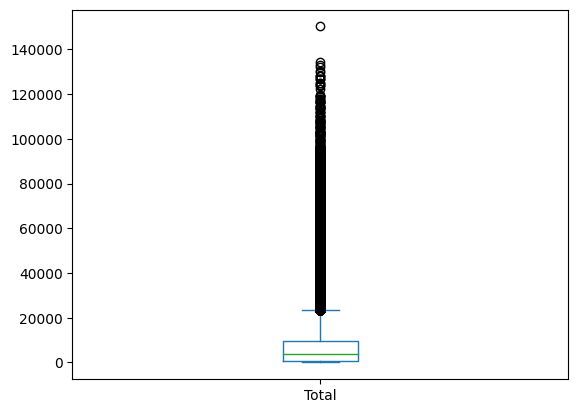

In [13]:
Auto_EDA()